# Welcome 

Oh hey.

# Tutorial Overview: 

## What is Robotics?

Robots are machines that move through the world and perform tasks. Robotics is the task of building, programming, and controlling robots. 

## What Will We Examine Today?

We will focus on building up some basic programming skills and applying them to problems in planning and control of robot motion. 

### Programming

We will be doing this lesson in Python. It is one of the main programming languages used in industry, research, and teaching. 

We will examine things like mathematical calculations, loops, and functions. These are basic building blocks found in software that we used all the time. 

### How Programming Relates to Robot Planning and Control

Robots are controlled by computers. To move through the world and do their thing, they need to be programmed. The two main tasks we will examine are:

* **Planning:** Determining a route the robot should take to get to a particular goal. Example: You (or someone with the group) planned the route you took to get to the tutorial. 
* **Control:** Controlling the movements of the robot to make sure it follows the planned route. Example: You controlled your arms and legs in order to follow the route to the tutorial.   

## Key Idea: Building Complex Behaviors from Simple Ones

In programming, robotics, and much else in life, big complex behaviors are built up from simpler ones. Some things we'll see:

* How to construct a complex motion plan from a series of simpler plans
* How the physical control of the robot influences its ability to follow a plan


# Jupyter Notebooks and Introduction to Python

This tutorial is run in a *Jupyter notebook*, which software for mixing text and code. We will be programming in Python, which is popular language for web development and scientific computing. 

Below is a "code cell" with the simplest Python program, "Hello World!". You can run code cells
* Click the "Run" button at the top
* Click the arrow on the side
* Press `Shift`+`Enter`

In [ ]:
print('Hello World!')

## Comments, variables, and other basic operations

Code is read by computers, but it also needs to be read by humans. "Comments" are pieces of text placed in code that don't do anything, but make it easier to read.

*Variables* are used to store data, such as numbers or text. 

In [ ]:
# This is a comment.

# i is an integer variable
i = 5
# j is another integer variable
j = i + 3

# This text variable is called string
s = 'Oh dear'

print(i)
print(j)
print(s)

## Functions and Variables

In "Hello World!", `print` is a Python function. Typically a function takes an input, and then does something with that input. Here is another example. Run it to see what happens.

In [ ]:
# This is a simple function
def squared(x):
    # the indented code is all part of the function
    return x**2

# This code is not indented, and is NOT part of the function
print(1,'squared is',squared(1))
print(2,'squared is',squared(2))
print(3,'squared is',squared(3))

## Exercise: `fiendishlyDifficultQuadratic`

In the code cell below, define a function called `fiendishlyDifficultQuadratic` that takes an input $x$, and returns the value $x^2+5x-3$.

As with the `squared` example, print out a few values to make sure that you have done it correctly.

In [ ]:
# Define your function here.

# Print some outputs here

# The Rolling Sphere

In simulation studies, it is common to study simplified models. Here we will examine a rolling ball. Run the code below. 

* You can control the ball with the arrow keys
* Press ESC to exit the simulation
* You should exit the simulations before moving on to new parts of the code. It could lead to weird behavior if you don't.

Before we can work with this model, we need to load some functions. You *must* run this cell in order to do the rest of the tutorial.

In [1]:
# Do not modify this code 
import discoverSTEM as ds
import numpy as np

%matplotlib inline

Running Simulation: Please Close Window before Moving On


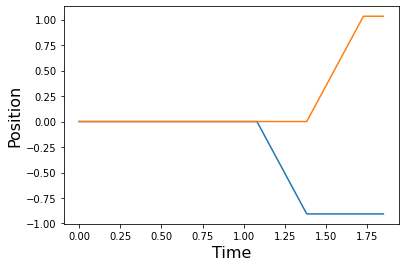

In [2]:
# This code simulates the rolling ball
ds.ballSmall()
# After the simulation, the trajectory of the ball is plotted

## The `ds.moveSphereTo` motion primative

Here we describe a controller, `ds.moveSphereTo`, which moves the ball to a specific coordinate. First we show the coordinates of the environment.

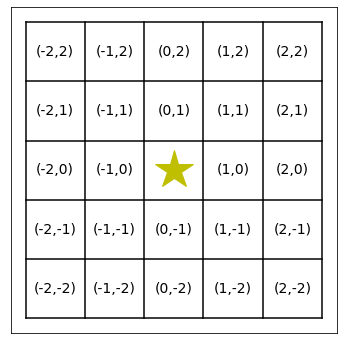

In [3]:
# This command shows the coordinates of the environment
ds.smallLayout.plot()

Running Simulation: Please Close Window before Moving On


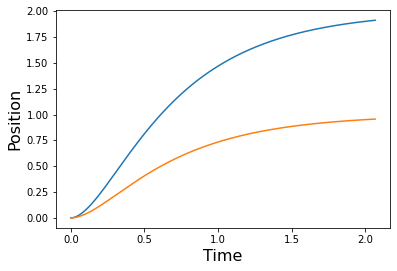

In [3]:
# Here is an example of the moveSphereTo command
mtController = ds.moveSphereTo(2,1)
ds.ballSmall(mtController)

## Exercise: Using the `ds.moveSphereTo` controller
Play around with the code above to move the sphere to various points in the environment.

## Sequencing Movement Primitives and Lists

Now we will use the `ctrl.moveSphereTo` command as a building block to create more complex motions. The command `ctrl.controllerSequence` takes a *list* of simpler controllers and builds a controller that executes them in a sequence. Run the code below to see how it works.

Running Simulation: Please Close Window before Moving On


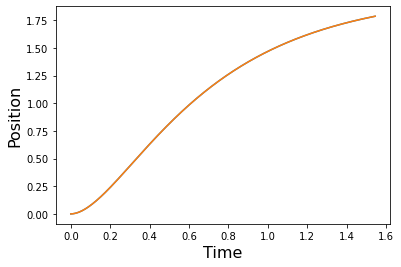

In [4]:
# This is a list
controllerList = [ds.moveSphereTo(2,2),
                  ds.moveSphereTo(2,-2),
                  ds.moveSphereTo(-2,-2),
                  ds.moveSphereTo(-2,2),
                  ds.moveSphereTo(0,0)]

wpController = ds.controllerSequence(controllerList)
ds.ballSmall(wpController)

The points, such as $(2,2)$ and $(2,-2)$ that the sphere must pass through are called *waypoints*.

## Programming background: `for`-Loops

The controller list above holds 5 different `moveSphereTo` commands. However, for longer lists, writing `ds.moveSphereTo` every time would be tedious and error prone. Loops enable such repetitive tasks to be automated.

A useful loop is called the *for-loop*. It takes each element to a list and performs a computation on it. Here is an example.

In [ ]:
# This is a list.
margotList = ['Margot','is', 'a', 'dog','and','I','love','her']

# This is a for-loop
for word in margotList:
    # The indented code is executed for every word
    print(word)


This is Margot. 
<img src="figures/margot.JPG" alt="Margot" width="300px"/>

Here is an example of using a for-loop to make a new list

In [ ]:
# here is a list of a bunch of numbers
NumberList = [-5,2,0,2,-1,3]

print('These are the original numbers')
print(NumberList)

# This is a list with no entries
SquareList = []
for n in NumberList:
    # We add new entries to the list 
    SquareList.append(squared(n))
    
    
print('This is list of their squares')
print(SquareList)


Here is a way of making the controller list using a for-loop. It does the same thing as the sequence of controllers that we had before. But now, we only needed to write `ds.moveSphereTo` once, instead of 5 times. This may not seem like much, but later we will change how we use the `ds.moveSphereTo` command. When we change it, we only need to modify 1 instance, instead of 5. 

In [ ]:
# First define the waypoints
waypoints = [(2,2),
             (2,-2),
             (-2,-2),
             (-2,2),
             (0,0)]

# Then define the controllers
controllerList = []
for x,y in waypoints:
    movementPrimitive = ds.moveSphereTo(x,y)
    controllerList.append(movementPrimitive)

wpController = ds.controllerSequence(controllerList)
ds.ballSmall(wpController)

## Exercise: Fiendishly Difficult For-Loops

Use a for-loop and your `fiendishlyDifficultQuadratic` function to compute $x^2+5x-3$ for each entry in `NumberList`. Save it in a new list called `fiendishList`.

In [ ]:
# Make your new list here

# print it out here to make suer you did it correctly


## The Maze Environment

Now we will take what we learned about lists and movement primatives, and use it to navigate through a maze. The code cell below gives the layout and coordinates of the maze.

In [ ]:
layout = ds.mazeLayout
layout.plot()

The goal is to get from $(-4,-4)$ to the center, $(0,0)$.

In [5]:
# If you want to solve the maze manually run this code
ds.ballMaze()

Running Simulation: Please Close Window before Moving On
Simulation Terminated before Solve


## Exercise: Navigation by waypoints

* Make a list waypoints to solve the maze:
    * Moving from one waypoint to the next should not hit a wall
    * The final waypoint should be at the center, (0,0)
* Use a for-loop to make a list which has a `ds.moveSphereTo` controller for each waypoint
* Use the command `ds.controllerSequence` to make a controller called `ballMazeController` which solves the maze.

Hint: some example code above does most of the work, but the waypoint sequence does not solve the maze.

In [ ]:
# Make your controller here

# This will test your controller
# It will only work if you named your controller ballMazeController

ds.ballMaze(ballMazeController)

Solving this problem using for-loops has an added advantage: If we want to change the `ds.moveSphereTo` command to something else, we only need to change one line.

## Feedback Control: Under the Hood

The rolling sphere is modeled by Newton's equations. So, we need to apply forces to the ball to drive it to desired locations. We compute these forces using a method called *Proportional-Derivative Control* or PD Control. 

If $p$ is the current position, $p_{wp}$ is the desired waypoint position, and $v$ is the velocity, the PD controller gives a force defined by:
\begin{equation}
F = -K_P (p-p_{wp}) - K_D v
\end{equation}
* $K_P$ is the called *proportional gain*, since $K_P (p-p_{wp})$ is proportional to the error in the desired position. The force $-K_P (p-p_{wp})$ acts as a virtual spring between the sphere and the waypoint.
* $K_D$ is the *derivtive gain*, since $K_D v$ is the derivative (from calculus) of the position error. The force $-K_D v$ acts as a virtual damper, slowing the system down. 

(Proportional-Derivative control is a special case of a method known as Proportional-Integral-Derivative (PID) control. It is used in applications like cruise controllers, autopilots, factory equipment, electric generators, and printers. Basically, if something moves on its own, there is good chance it is using a PID controller.)

## Exercise: Experimenting with the Gains

In the code below change the $K_P$ and $K_D$ values and see what happens.

Below are some suggested experiments:

* Hold $K_D$ fixed and vary $K_P$. 
    * For low values of $K_P$, the position should steadily rise to its limit of $1$.
    * For intermediate values of $K_P$, the position will "overshoot", and then settle down to $1$.
    * For large balues of $K_P$, the position will oscillate before settling down to $1$.

* Try to find $K_P$ and $K_D$ so that:
    * The position reaches $1$ at around $1/2$ second
    * No over-shoot or oscillation occurs

Running Simulation: Please Close Window before Moving On


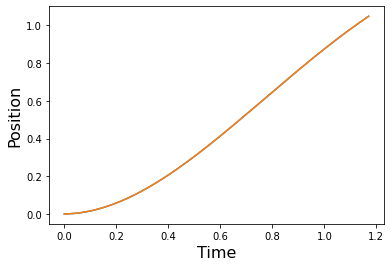

In [6]:
# Try changing the K_P and K_D values

K_P = 1
K_D = 1

# This is just the same command, ds.moveSphereTo, with some extra parameters passed in
mtController = ds.moveSphereTo(1,1,K_P,K_D)
ds.ballSmall(mtController)

# Exercise: Tuning the Gains for High Performance

Modify the controller you used to solve the maze by setting values for $K_P$ and $K_D$. 
* Try to get the solve time to be small. (Well chosen values can get the time down to around 3 seconds.)
* Try to get the input energy to small. (Well chosen values can get the energy down to under 1 unit.)

Think about the following questions:
* What happens to the input energy when the solve time is small?
* What happens to the solve time when the input energy is small?

# The Differential Drive Car

Now we will move on to a slightly more complex model, called the differential drive car. It is a model for vehicles like excavators and tanks, which can turn their wheels / tracks on either side of the vehicle independently. These vehicles are easier to maneuver than standard cars, since they can turn in place. 

For demo purposes, you can control it manually:
* The arrows turn / move the vehicle
* ESC exits the simulation

Running Simulation: Please Close Window before Moving On


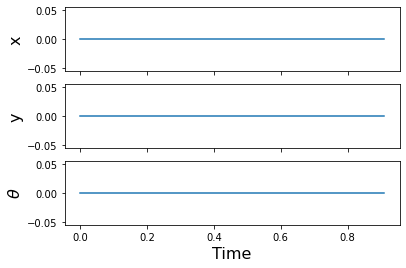

In [7]:
ds.carSmall()


For this vehicle, we will build complex motions from two movement primitives:
* Turning in place
* Driving in a straight line

## Exercise: Turning in place

Similar to the rolling ball, we can use PD control to achieve desired angles. The code below uses PD control to turn from any angle to an angle of $\pi/2$. Tune the gains $K_{P,ang}$  and $K_{D,ang}$ so that:
* No overshoot occurs
* The vehicle angle,  $\theta$, converges to $\pi/2$ in under 1 second.

Running Simulation: Please Close Window before Moving On


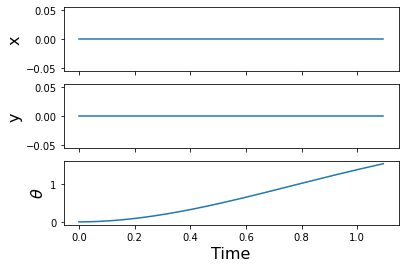

In [8]:
K_P_ang = 1
K_D_ang = 1
# We represent the angle pi / 2 using the command np.pi/2
turnController = ds.turnCar(np.pi/2,K_P_ang,K_D_ang)
ds.carSmall(turnController)

Play around with the code to make the vehicle turn to different angles 

## Exercise: Moving in straight line

Again, we can use PD control to control the amount of forward movement of the system. Tune the gains $K_P$ and $K_D$ so that 
* No overshoot occurs
* The $x$ value goes from $0$ to $1$ in approximately 1 second

Running Simulation: Please Close Window before Moving On


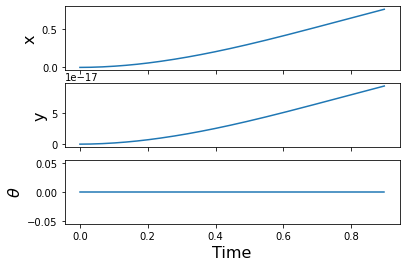

In [9]:
K_P_for = 1
K_D_for = 1
forwardController = ds.carForward(1,K_P_for,K_D_for)
ds.carSmall(forwardController)

Play around with the code (by changing 1 to something else) to make the car drive different distances.

##  Demonstration: Driving to a Desired Location

If we want to drive to a particular location, we can first turn the car so it is pointing at the desired location, and then drive to it in a straight line. To do this, we first calculate the angle we need to point to the location and also the distance we need to travel. These are done by some helper functions. (These are done with some basic trigonometry.)

In [2]:
def desired_angle(x_start,y_start,x_goal,y_goal):
    dy = y_goal - y_start
    dx = x_goal - x_start
    return np.arctan2(dy,dx)

def desired_distance(x_start,y_start,x_goal,y_goal):
    return np.sqrt((x_goal-x_start)**2 + (y_goal-y_start)**2)
    

Run this code to see how the turn and drive controller works. If your car oscillates a lot, or bonks into the walls, your `K_D_ang` or `K_D_for` terms are probably too low.

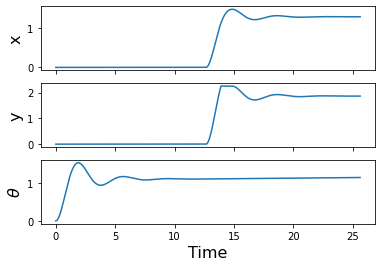

In [12]:
# Calculate the Angle and Distance
x_start = 0
y_start = 0
x_goal = 1
y_goal = 2

angle = desired_angle(x_start,y_start,x_goal,y_goal)
distance = desired_distance(x_start,y_start,x_goal,y_goal)

# Build the Controller from Simpler Controllers
turnController = ds.turnCar(angle,K_P_ang,K_D_ang)
driveController = ds.carForward(distance,K_P_for,K_D_for)
carToPointController = ds.controllerSequence([turnController,driveController])
ds.carSmall(carToPointController)

## Exercise: 

Using `ctrl.turnCar`, `ctrl.carForward`, and `ctrl.controllerSequence` commands, design a controller that drives the car from its initial condition to the center of the maze. Call your controller `carMazeController`

Hint: This can be accomplished by navigating to waypoints, as with the ball. Now, however, you can construct the motion like was done in the demonstration above: turn to the waypoint, and then drive to it. 

In [ ]:
# Define carMazeController here

# It is helpful to know where we startfrom
x_start = -4
y_start = -4

# This will test your controller
# Remember, the controller won't work unless you call it carMazeController
ds.carMaze(carMazeController)

# Recap 

We saw how to build use feedback control to create simple movements called "primatives." Then, we used these primatives to build controllers that could navigate through mazes. We focused on simple mobile robots, but this same basic idea works for other robots such as quadcopters and other tasks, such as object manipulation. 

